In [2]:
import json
import os
import pandas as pd

# load group4 metadata json
with open('./grp4-metadata.json', 'r') as file:  # Replace with your file name if different
    grp_metadata_json = json.load(file)

# load caltech_images_202100113.json which contains the datetime info
with open('./caltech_images_20210113.json', 'r') as file:  # Replace with your file name if different
    raw_metadata_json = json.load(file)

# convert to pandas df
grp_meta_df = pd.DataFrame(grp_metadata_json)
raw_meta_img_df = pd.DataFrame(raw_metadata_json['images'])
# set index to "id"
raw_meta_img_df.set_index('id', inplace=True)



In [10]:
import seaborn as sns   
import matplotlib.pyplot as plt

In [3]:
raw_meta_img_df.head()

,seq_num_frames,date_captured,seq_id,height,width,location,rights_holder,file_name,frame_num
id,,,,,,,,,
5968c0f9-23d2-11e8-a6a3-ec086b02610b,1,2013-10-04 13:31:53,6f2160eb-5567-11e8-990e-dca9047ef277,1494,2048,26,Erin Boydston,5968c0f9-23d2-11e8-a6a3-ec086b02610b.jpg,1
5a0b016f-23d2-11e8-a6a3-ec086b02610b,1,2013-11-04 18:37:07,6f27ed66-5567-11e8-9e92-dca9047ef277,1494,2048,26,Erin Boydston,5a0b016f-23d2-11e8-a6a3-ec086b02610b.jpg,1
59b93afb-23d2-11e8-a6a3-ec086b02610b,3,2012-05-09 07:33:45,6f04895c-5567-11e8-a3d6-dca9047ef277,1494,2048,38,Justin Brown,59b93afb-23d2-11e8-a6a3-ec086b02610b.jpg,2
59641f56-23d2-11e8-a6a3-ec086b02610b,3,2012-03-29 02:34:13,6f0385b5-5567-11e8-a80b-dca9047ef277,1494,2048,38,Justin Brown,59641f56-23d2-11e8-a6a3-ec086b02610b.jpg,2
5a1e5306-23d2-11e8-a6a3-ec086b02610b,3,2012-05-08 19:23:36,6f0a3ccf-5567-11e8-92fb-dca9047ef277,1494,2048,33,Justin Brown,5a1e5306-23d2-11e8-a6a3-ec086b02610b.jpg,2


In [4]:
# add datetime info to grp_meta_df based on raw_meta_img_df on "id"
grp_meta_df['date_captured'] = grp_meta_df['image_id'].map(raw_meta_img_df['date_captured'])
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[499.2, 711.68, 353.28, 199.68]",5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,train,2011-05-13 23:43:18
1,588a679f-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[985.6, 783.36, 368.64, 230.4]",588a679f-23d2-11e8-a6a3-ec086b02610b,115,train,2012-03-17 03:48:44
2,593d68d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,squirrel,5,"[1779.2, 407.04, 61.44, 84.48]",593d68d7-23d2-11e8-a6a3-ec086b02610b,90,train,2011-06-28 15:29:42
3,59fae563-23d2-11e8-a6a3-ec086b02610b_0.jpg,rabbit,10,"[1456.0, 480.0, 156.8, 137.6]",59fae563-23d2-11e8-a6a3-ec086b02610b,46,val,2012-01-05 07:41:39
4,595f7b9c-23d2-11e8-a6a3-ec086b02610b_0.jpg,rodent,99,"[249.3516082764, 798.4633789062, 291.603164672...",595f7b9c-23d2-11e8-a6a3-ec086b02610b,67,val,2014-09-28 01:00:53


In [6]:
# sort by date captured before saving to csv
grp_meta_df['date_captured'] = pd.to_datetime(grp_meta_df['date_captured'], errors='coerce')
grp_meta_df = grp_meta_df.sort_values(by='date_captured')
grp_meta_df.head()

,filename,label,category_id,bbox,image_id,location,split_type,date_captured
15820,585f4d43-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[1200.64, 568.32, 146.7734375, 246.613359375]",585f4d43-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:56
3499,59180801-23d2-11e8-a6a3-ec086b02610b_0.jpg,cat,16,"[999.253359375, 404.48, 129.706640625, 218.453...",59180801-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 20:32:57
44281,588dba7d-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1213.44, 637.44, 212.48, 271.36]",588dba7d-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:28
34228,58bea7d7-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[1062.4, 808.96, 279.04, 238.08]",58bea7d7-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:29
36935,58a8a344-23d2-11e8-a6a3-ec086b02610b_0.jpg,opossum,1,"[870.4, 960.0, 261.12, 337.92]",58a8a344-23d2-11e8-a6a3-ec086b02610b,100,val,2010-05-25 22:35:30


In [7]:
# save to csv
grp_meta_df.to_csv('./grp4_metadata_with_datetime.csv', index=False)

In [8]:
# eda/dist plots
# plot category distribution per month over time

def plot_monthly_class_distribution(df, feature_name = 'label', production_start_idx=None, color_palette='husl'):
    """
    Plots the monthly distribution of the specified class in the dataset
    
    Parameters:
    - df: DataFrame containing 'date_captured' and 'label' columns.
    - class_name: The name of the class column to analyze (default is 'label'). can be 'location' 
    
    - production_start_idx: Optional; date to indicate the index where production split starts in time-sorted df.
    """
    # Convert 'date_captured' to datetime if not already
    df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
    
    # Filter by date range if specified
    #if start_date:
    #    df = df[df['date_captured'] >= pd.to_datetime(start_date)]
    #if end_date:
    #    df = df[df['date_captured'] <= pd.to_datetime(end_date)]
    
    # Extract year and month from 'date_captured'
    df['year_month'] = df['date_captured'].dt.to_period('M')
    
    # Group by year_month and label, then count occurrences
    monthly_counts = df.groupby(['year_month', feature_name]).size().unstack(fill_value=0)

    # add missing year_month to the monthly_counts DataFrame
    all_periods = pd.period_range(start=df['year_month'].min(), end=df['year_month'].max(), freq='M')
    monthly_counts = monthly_counts.reindex(all_periods, fill_value=0)
    #monthly_counts.index = monthly_counts.index.astype(str)  # Convert PeriodIndex to string for better plotting
    
    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_palette(color_palette, n_colors=df[feature_name].nunique())
    ax = monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    # If production_start_idx is provided, add a vertical line to the plot
    if production_start_idx:
        # Get the production start date from the index
        production_start_idx = int(production_start_idx)
        # Get the date at the production start index
        production_start_date = df['date_captured'].iloc[production_start_idx]
        production_start_year_month = production_start_date.to_period('M')
        production_start_x = monthly_counts.index.get_loc(production_start_year_month)
        
        

        # split the dataset into modeling and production datasets according to production start idx
        modeling_df = df[:production_start_idx]
        production_df = df[production_start_idx:]

        # get count distribution of labels for modeling and production datasets
        # show distribution of labels in modeling and production datasets
        labels_distribution_df = pd.DataFrame({'label': df['label'].unique()})
        labels_distribution_df.set_index('label', inplace=True)
        # Add modeling and production counts to the labels_distribution_df
        labels_distribution_df['modeling count'] = modeling_df['label'].value_counts().reindex(labels_distribution_df.index, fill_value=0)
        labels_distribution_df['production count'] = production_df['label'].value_counts().reindex(labels_distribution_df.index, fill_value=0)

        current_legend_labels = [t.get_text() for t in ax.legend_.texts]

        # Add modeling and production counts to the legend
        #display(current_legend_labels)
    
        # sort labels distribution df according to current legend labels
        labels_distribution_df = labels_distribution_df.reindex(current_legend_labels, axis=0, fill_value=0)
        display(labels_distribution_df)

        
        
        # Add modeling and production counts to the legend
        legend_labels = [f"{i}: ({labels_distribution_df['modeling count'][i]} - {labels_distribution_df['production count'][i]})" for i in labels_distribution_df.index]

        ax.legend(legend_labels, title='Label (Dev/Prod Count)', loc='upper left')
        #ax.legend(labels_distribution_df, title='Dataset', loc='upper left')
        #display(current_legend_labels)
        plt.axvline(x=production_start_x, color='red', linestyle='--', label='Production Start')

        # add annotations to the vertical line

        image_split_info = f'image file count: {len(modeling_df)} ({len(modeling_df) / len(df) * 100:.2f}%) / {len(production_df)} ({len(production_df) / len(df) * 100:.2f}%)'

        date_span = df['date_captured'].max() - df['date_captured'].min()
        total_days = date_span.days
        production_days = df['date_captured'].max() - production_start_date
        production_days = production_days.days
        modeling_days = total_days - production_days
        #display(f"production days: {production_days}, total days: {total_days}")

        day_split_info = f"days count: {modeling_days} ({modeling_days / total_days * 100:.2f}%) / {production_days} ({(production_days) / total_days * 100:.2f}%)"


        plt.annotate(#f'Dev/Production Split:\nsample index:{production_start_idx}\nimg count : {len(modeling_df)} ({len(modeling_df) / len(df) * 100:.2f}%) / {len(production_df)} ({len(production_df) / len(df) * 100:.2f}%)', 
                     f'DATASET SPLIT TIMING\nsample index:{production_start_idx}\n{image_split_info}\n{day_split_info}', 
                     xy=(production_start_x, monthly_counts.max().max()+2000), 
                     
                     #xytext=(production_start_x + 5, monthly_counts.max().sum() * 0.9),
                     xytext=(production_start_x + 2, (monthly_counts.max().max()+2000) * 0.9),
                     arrowprops=dict(arrowstyle="->", linewidth=1, color='red', alpha = 0.8), 
                     fontsize=10, color='black',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", lw=1, facecolor='white', alpha=0.8)
        )   
             
    else:
        ax.legend(title='Labels')

    # set x-ticks label to be the actual year and the actual month numbers
    
    #display(monthly_counts.head())
    plt.title(f'Monthly {feature_name} Distribution Over Time')
    plt.xlabel('year_month')
    plt.ylabel('Count')
    #plt.xticks(ticks=range(len(monthly_counts)), labels=monthly_counts['Year-Month'], rotation=90)

  
    # create legend for the feature_name
    #plt.legend(legend)

    plt.tight_layout()
    

    if production_start_idx:
        # show count distributions of labels based on production split 
        sns.set_palette("tab10")
        plt.figure()
        # Create a bar plot for the labels distribution
        sns.barplot(data=labels_distribution_df.reset_index().melt(id_vars='label'), 
                    x='label', y='value', hue='variable')
        # Set the title and labels
        plt.title(f'Image Files Count Distribution for Production Split Idx @ {production_start_idx}')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.legend(title='Dataset')
        # Show the plot
        plt.tight_layout()
        
    
    plt.show()

,modeling count,production count
label,,
badger,21,7
bat,0,1
bird,761,3265
bobcat,3804,1244
car,2056,501
cat,2958,1433
coyote,3956,2549
deer,71,6357
dog,2052,808


<Figure size 1400x800 with 0 Axes>

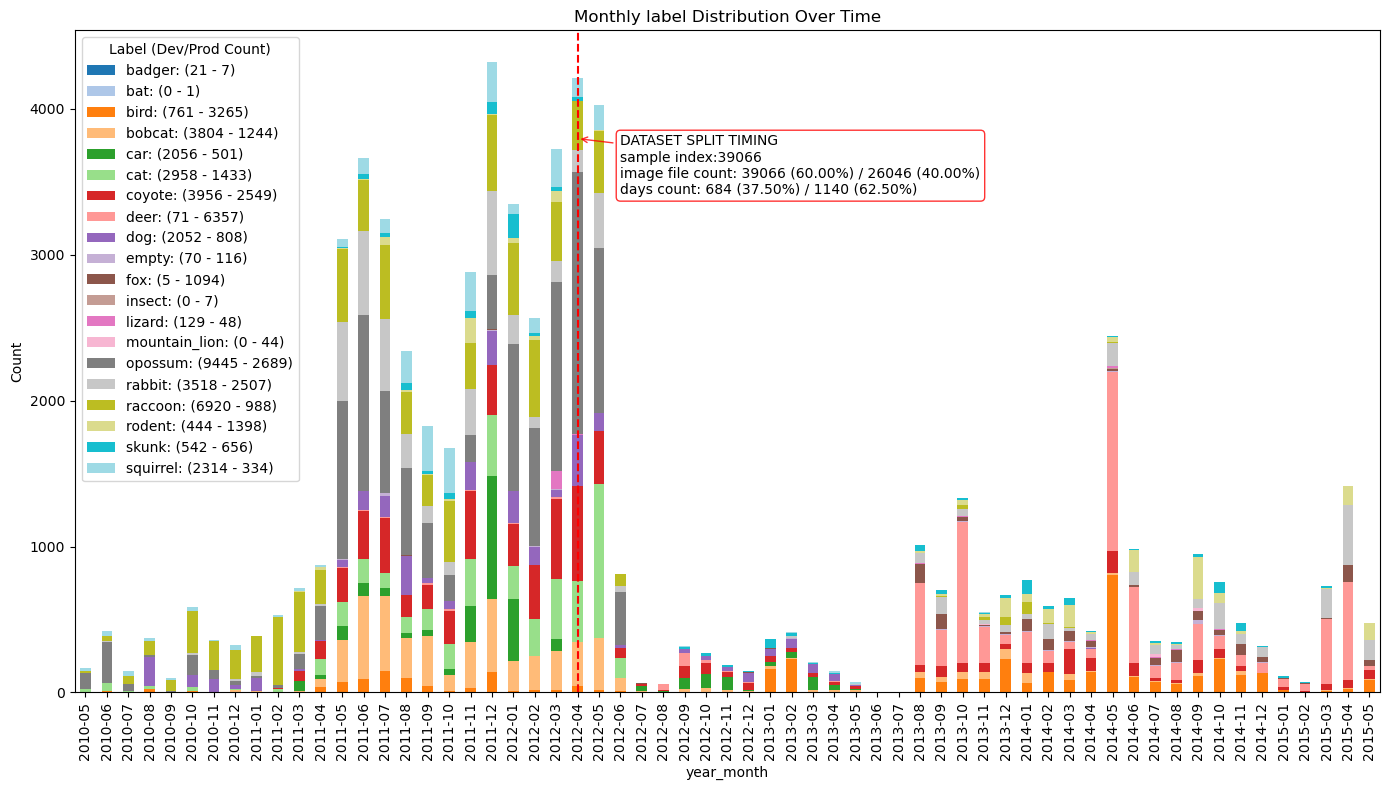

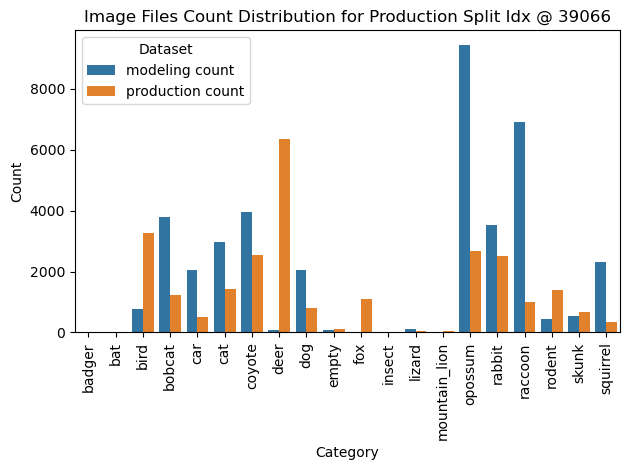

In [11]:
# plot monthly label distribution of the entire dataset
# mark the hypothetical production start index with a vertical line @ 40% image file count partition
split_idx = 39066
plot_monthly_class_distribution(grp_meta_df, feature_name = 'label', color_palette='tab20', production_start_idx = split_idx)

,modeling count,production count
label,,
badger,25,3
bat,0,1
bird,1231,2795
bobcat,4598,450
car,2557,0
cat,4391,0
coyote,5183,1322
deer,245,6183
dog,2848,12


<Figure size 1400x800 with 0 Axes>

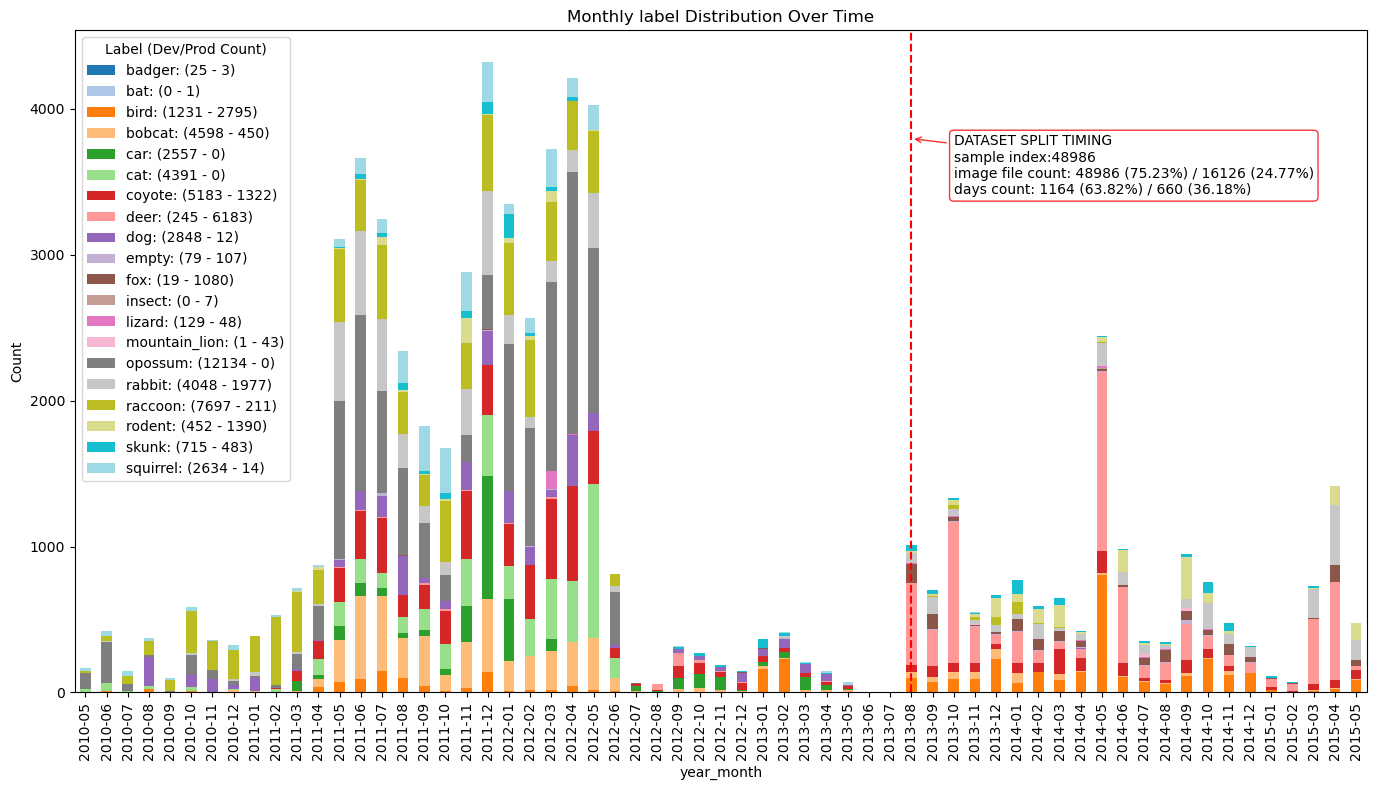

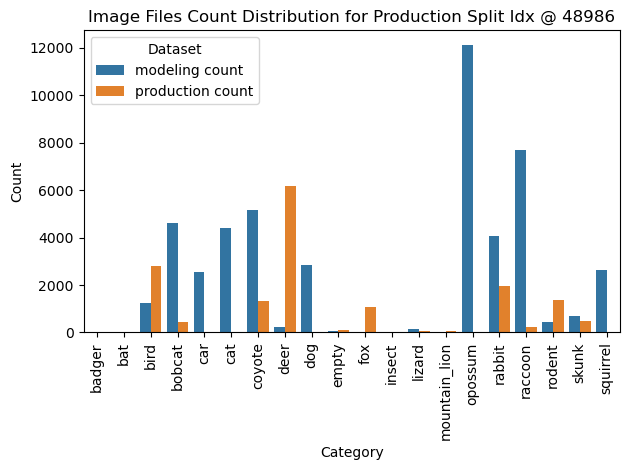

In [12]:
# plot eda/stats if production split is based on number of days
split_idx = 48986
plot_monthly_class_distribution(grp_meta_df, feature_name = 'label', color_palette='tab20', production_start_idx = split_idx)